In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## Load Dataset

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
# Load the Wine dataset
wine = load_wine()

In [ ]:
df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
df.shape

(178, 14)

In [ ]:
X = df.drop(columns=('target'))
y = df['target']
X.shape, y.shape

((178, 13), (178,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
sc = StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Applying MLPClassifer

### One layer

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons:13.00
Accuracy: 0.94


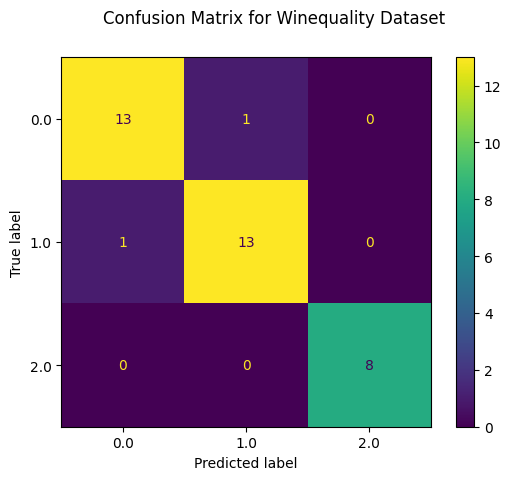

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(13),
                            max_iter = 300,activation = 'relu',
                            solver = 'adam')
mlp_clf.fit(X_train_scaled, y_train)

y_pred = mlp_clf.predict(X_test_scaled)

print('Neurons:{:.2f}'.format(13))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

fig = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset")
plt.show()

### Trying out 3 layers

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [ ]:
y_pred = mlp_clf.predict(X_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 1.00


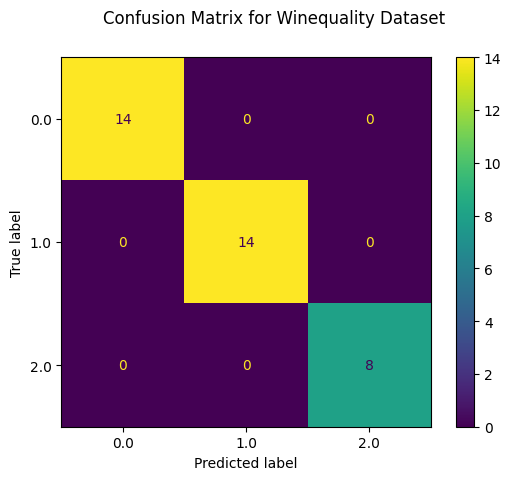

In [ ]:
fig = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



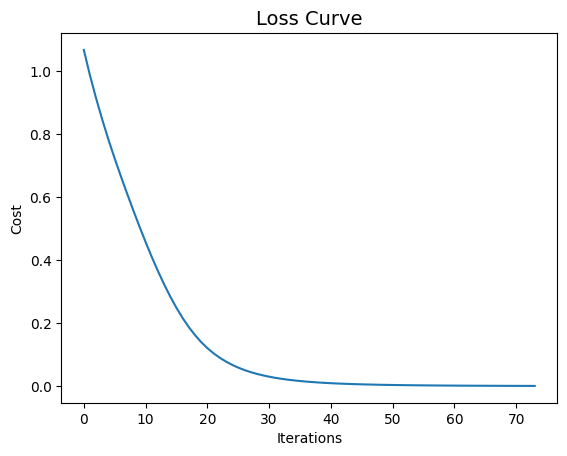

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Attempt 1


In [3]:
import numpy as np

In [ ]:
# Define the ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


## Building MLPClassifier from Scratch

In [78]:
# Define the ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims= True))
    return exp_x / np.sum(exp_x, axis =1, keepdims= True)

def sparse_categorical_crossentrophy(predictions, targets):
    N = predictions.shape[0]
    ce = -np.sum(np.log(predictions[np.arange(N), targets] + 1e-9)) / N
    return ce

# Define the neural network class with one hidden layer
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases with random values
        # He initialization for the weights
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)*np.sqrt(2. / self.input_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)*np.sqrt(2. / self.hidden_size)
        self.bias_output = np.zeros((1, self.output_size))


    def forward(self, inputs):
        # Forward propagation through the network
        hidden_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        hidden_output = relu(hidden_input)
        output = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output
        output = softmax(output)
        return output, hidden_output

    def backward(self, inputs, predicted_outputs, targets, hidden_output):
        # Backpropagation
        output_error = predicted_outputs.copy()
        output_error[np.arange(len(targets)), targets] -=1
        hidden_error = output_error.dot(self.weights_hidden_output.T) * relu_derivative(hidden_output)

        # Update weights and biases using gradient descent
        self.weights_hidden_output -= hidden_output.T.dot(output_error) * self.learning_rate
        self.bias_output -= np.sum(output_error, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden -= inputs.T.dot(hidden_error) * self.learning_rate
        self.bias_hidden -= np.sum(hidden_error, axis=0, keepdims=True) * self.learning_rate


    def train(self, inputs, targets, epochs):
        # Training the neural network
        for epoch in range(epochs):
            predicted_outputs, hidden_output = self.forward(inputs)
            loss = sparse_categorical_crossentrophy(predicted_outputs, targets)
            print(f"Epoch {epoch+1}/{epoch}, Loss : {loss:.4f}")
            self.backward(inputs, predicted_outputs, targets, hidden_output)


In [79]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

In [80]:
import pandas as pd
df_X = pd.DataFrame(X)
df_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [81]:
import pandas as pd
df_y = pd.DataFrame(y)
df_y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [82]:
df_y.value_counts()

1    71
0    59
2    48
dtype: int64

In [83]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [84]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


In [86]:
# Initialize and train the neural network
input_size = X_train.shape[1]
hidden_size = 128  # You can adjust the number of hidden neurons
output_size = len(np.unique(y))  # Number of classes in the Wine dataset
learning_rate = 0.0001
epochs = 100


neural_network = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
#neural_network.train(X_train, y_train.reshape(-1, 1), epochs)
neural_network.train(X_train, y_train, epochs)

# Test the trained network
predicted_outputs, _ = neural_network.forward(X_test)
predicted_labels = np.argmax(predicted_outputs, axis=1)
accuracy = np.mean(predicted_labels == y_test)
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

Epoch 1/0, Loss : 1.7889
Epoch 2/1, Loss : 1.5578
Epoch 3/2, Loss : 1.3693
Epoch 4/3, Loss : 1.2137
Epoch 5/4, Loss : 1.0836
Epoch 6/5, Loss : 0.9739
Epoch 7/6, Loss : 0.8808
Epoch 8/7, Loss : 0.8015
Epoch 9/8, Loss : 0.7339
Epoch 10/9, Loss : 0.6758
Epoch 11/10, Loss : 0.6258
Epoch 12/11, Loss : 0.5824
Epoch 13/12, Loss : 0.5446
Epoch 14/13, Loss : 0.5114
Epoch 15/14, Loss : 0.4821
Epoch 16/15, Loss : 0.4561
Epoch 17/16, Loss : 0.4329
Epoch 18/17, Loss : 0.4121
Epoch 19/18, Loss : 0.3934
Epoch 20/19, Loss : 0.3765
Epoch 21/20, Loss : 0.3611
Epoch 22/21, Loss : 0.3471
Epoch 23/22, Loss : 0.3343
Epoch 24/23, Loss : 0.3225
Epoch 25/24, Loss : 0.3117
Epoch 26/25, Loss : 0.3017
Epoch 27/26, Loss : 0.2924
Epoch 28/27, Loss : 0.2838
Epoch 29/28, Loss : 0.2758
Epoch 30/29, Loss : 0.2683
Epoch 31/30, Loss : 0.2613
Epoch 32/31, Loss : 0.2547
Epoch 33/32, Loss : 0.2485
Epoch 34/33, Loss : 0.2427
Epoch 35/34, Loss : 0.2373
Epoch 36/35, Loss : 0.2321
Epoch 37/36, Loss : 0.2272
Epoch 38/37, Loss : 